In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("Data.csv")
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [27]:
data['date'].unique()

array(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-

In [28]:
lastest_date = '2020-02-28'
data[data['date']==lastest_date]

iso_code      continent             location        date  total_cases  \
4            AFG           Asia          Afghanistan  2020-02-28          5.0   
756     OWID_AFR            NaN               Africa  2020-02-28          3.0   
1496         ALB         Europe              Albania  2020-02-28          NaN   
2236         DZA         Africa              Algeria  2020-02-28          1.0   
5912         ARG  South America            Argentina  2020-02-28          NaN   
...          ...            ...                  ...         ...          ...   
156485       GBR         Europe       United Kingdom  2020-02-28         56.0   
157259       USA  North America        United States  2020-02-28         17.0   
158033  OWID_UMC            NaN  Upper middle income  2020-02-28      78909.0   
162183       VNM           Asia              Vietnam  2020-02-28         16.0   
163460  OWID_WRL            NaN                World  2020-02-28      84149.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
4             0.0                 NaN           NaN         NaN   
756           1.0               0.286           NaN         0.0   
1496          NaN                 NaN           NaN         NaN   
2236          0.0                 NaN           NaN         NaN   
5912          NaN                 NaN           NaN         NaN   
...           ...                 ...           ...         ...   
156485       12.0               4.714           NaN         NaN   
157259        0.0               0.143           NaN         NaN   
158033      333.0             482.429        2788.0        44.0   
162183        0.0               0.000           NaN         NaN   
163460     1399.0            1043.286        2873.0        59.0   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
4                       NaN  ...             NaN           NaN   
756                   0.000  ...             NaN           NaN   
1496                    NaN  ...           7.100        51.200   
2236                    NaN  ...           0.700        30.400   
5912                    NaN  ...          16.200        27.700   
...                     ...  ...             ...           ...   
156485                  NaN  ...          20.000        24.700   
157259                  NaN  ...          19.100        24.600   
158033               78.857  ...             NaN           NaN   
162183                  NaN  ...           1.000        45.900   
163460               88.714  ...           6.434        34.635   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
4                       37.746                       0.500            64.83   
756                        NaN                         NaN              NaN   
1496                       NaN                       2.890            78.57   
2236                    83.741                       1.900            76.88   
5912                       NaN                       5.000            76.67   
...                        ...                         ...              ...   
156485                     NaN                       2.540            81.32   
157259                     NaN                       2.770            78.86   
158033                     NaN                         NaN              NaN   
162183                  85.847                       2.600            75.40   
163460                  60.130                       2.705            72.58   

        human_development_index  excess_mortality_cumulative_absolute  \
4                         0.511                                   NaN   
756                         NaN                                   NaN   
1496                      0.795                                   NaN   
2236                      0.748                                   NaN   
5912                      0.845                                   NaN   
...                         ...                   

In [29]:
unique_countries = data[data.total_cases>0]['location'].unique()
unique_countries.sort
unique_countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [30]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.total_cases>0][data['location']==i][data['date']==lastest_date].total_cases.sum())
     

C:\Users\admin\AppData\Local\Temp\ipykernel_12596\1265681016.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.total_cases>0][data['location']==i][data['date']==lastest_date].total_cases.sum())


In [31]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Bolivia', 0.0), ('Czechia', 0.0), ('Papua New Guinea', 0.0), ('Romania', 3.0), ('Honduras', 0.0), ('Nigeria', 1.0), ('Slovenia', 0.0), ('Somalia', 0.0), ('Mongolia', 0.0), ('Rwanda', 0.0), ('Cook Islands', 0.0), ('Egypt', 1.0), ('Dominican Republic', 0.0), ('Vanuatu', 0.0), ('Belize', 0.0), ('Belarus', 1.0), ('Serbia', 0.0), ('Isle of Man', 0.0), ('Burkina Faso', 0.0), ('Brazil', 1.0), ('China', 78824.0), ('Grenada', 0.0), ('Saint Pierre and Miquelon', 0.0), ('Timor', 0.0), ('Eritrea', 0.0), ('Oceania', 16.0), ('Portugal', 0.0), ('Vatican', 0.0), ('Nicaragua', 0.0), ('Moldova', 0.0), ('Poland', 0.0), ('Africa', 3.0), ('Australia', 15.0), ('Bhutan', 0.0), ('Zambia', 0.0), ('Chad', 0.0), ('Andorra', 0.0), ('Cuba', 0.0), ('Mozambique', 0.0), ('British Virgin Islands', 0.0), ('Saint Helena', 0.0), ('Gabon', 0.0), ('Saint Kitts and Nevis', 0.0), ('Palestine', 0.0), ('Trinidad and Tobago', 0.0), ('Chile', 2.0), ('Iceland', 1.0), ('Croatia', 5.0), ('Namibia', 0.0), ('Barbados', 0.0), ('Dji

In [32]:
unique_provinces = data['continent'][data.total_cases>1].unique()
unique_provinces

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [33]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.total_cases>0][data['continent']==i][data['date']==lastest_date].total_cases.sum())

C:\Users\admin\AppData\Local\Temp\ipykernel_12596\1107345094.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.total_cases>0][data['continent']==i][data['date']==lastest_date].total_cases.sum())


In [34]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Oceania', 16.0), (nan, 0.0), ('Asia', 82236.0), ('South America', 3.0), ('North America', 46.0), ('Africa', 3.0), ('Europe', 1140.0)}


In [35]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [36]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [37]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

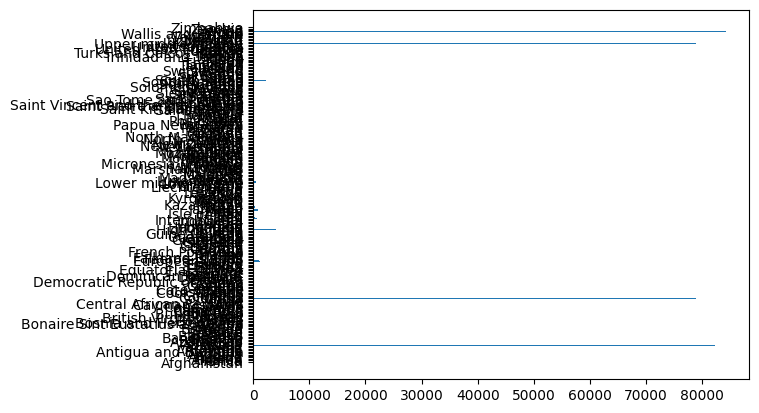

In [38]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()